In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = 'AzureUsageData.csv' 
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])




In [16]:
print(data.head())
print(data.tail())
print(data.describe())


                          SubscriptionName  \
0  Microsoft Workxflow Azure Sponsorship 1   
1  Microsoft Workxflow Azure Sponsorship 1   
2  Microsoft Workxflow Azure Sponsorship 1   
3  Microsoft Workxflow Azure Sponsorship 1   
4  Microsoft Workxflow Azure Sponsorship 1   

                       SubscriptionGuid       Date  \
0  ce833ac4-dac3-4815-99ef-35765a56dcc3 2024-01-13   
1  ce833ac4-dac3-4815-99ef-35765a56dcc3 2024-02-05   
2  ce833ac4-dac3-4815-99ef-35765a56dcc3 2024-01-10   
3  ce833ac4-dac3-4815-99ef-35765a56dcc3 2024-01-11   
4  ce833ac4-dac3-4815-99ef-35765a56dcc3 2024-01-12   

                           ResourceGuid        ServiceName        ServiceType  \
0  c0f5cb45-6fb1-41c9-8545-72ad400d9da4  Azure App Service          Free Plan   
1  c0f5cb45-6fb1-41c9-8545-72ad400d9da4  Azure App Service          Free Plan   
2  a90aec9f-eecb-42c7-8421-9b96716996dc  Azure App Service  Free Plan - Linux   
3  a90aec9f-eecb-42c7-8421-9b96716996dc  Azure App Service  Free Plan - Li

<Axes: title={'center': 'Annual Cost Distribution'}, xlabel='Year'>

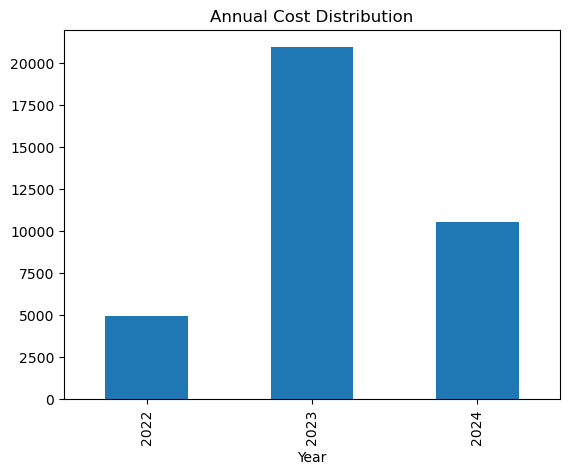

In [17]:
#Plot distribution of cost per year
data['Year'] = data['Date'].dt.year
data.groupby('Year')['Cost'].sum().plot(kind='bar', title='Annual Cost Distribution')

<Axes: title={'center': 'Monthly Cost Distribution'}, xlabel='Date'>

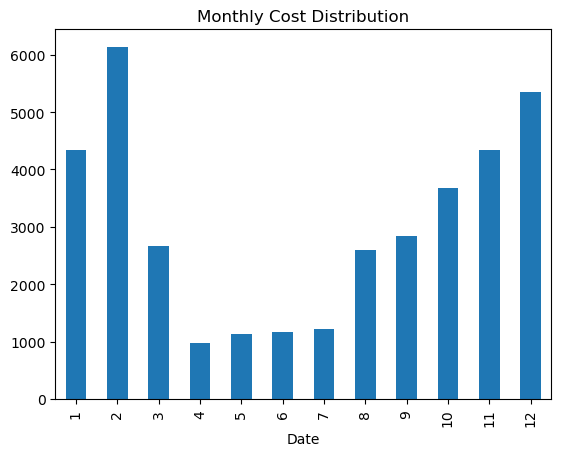

In [18]:
#Distribution of cost per month
data.groupby(data['Date'].dt.month)['Cost'].sum().plot(kind='bar', title='Monthly Cost Distribution')#Distribution of cost per month
data.groupby(data['Date'].dt.month)['Cost'].sum().plot(kind='bar', title='Monthly Cost Distribution')

<Axes: title={'center': 'Cost per Service Name'}, xlabel='ServiceName'>

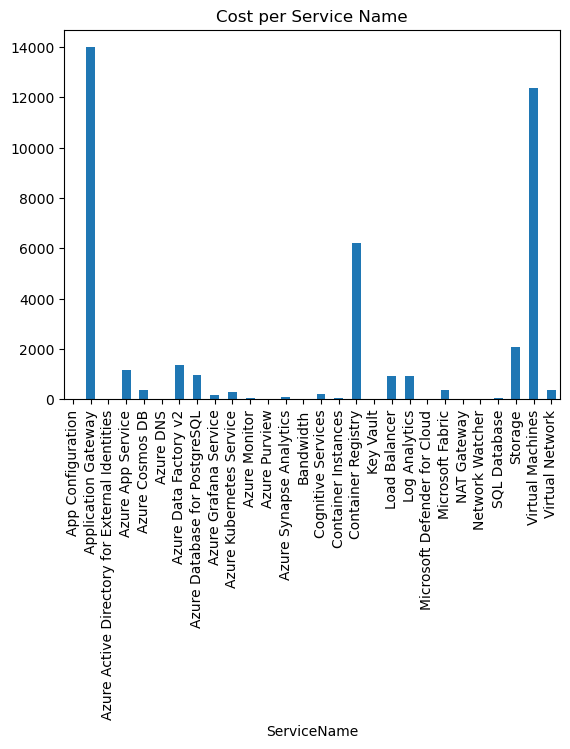

In [19]:
#Data exploration - cost data per service resources, service names
data.groupby('ServiceResource')['Cost'].sum().plot(kind='bar', title='Cost per Service Resource')
data.groupby('ServiceName')['Cost'].sum().plot(kind='bar', title='Cost per Service Name')

In [20]:
#Mean monthly cost - overall for 3 years, last 12 months average monthly costs
mean_monthly_cost_overall = monthly_costs.mean()
mean_monthly_cost_last_12_months = monthly_costs[-12:].mean()

print("Mean Monthly Cost Overall:", mean_monthly_cost_overall)
print("Mean Monthly Cost Last 12 Months:", mean_monthly_cost_last_12_months)

Mean Monthly Cost Overall: 1822.4090788
Mean Monthly Cost Last 12 Months: 2405.956749333333


C:\Users\PoojaniRathnayakeBIS\AppData\Local\Temp\ipykernel_39880\491006702.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='Date').sum()


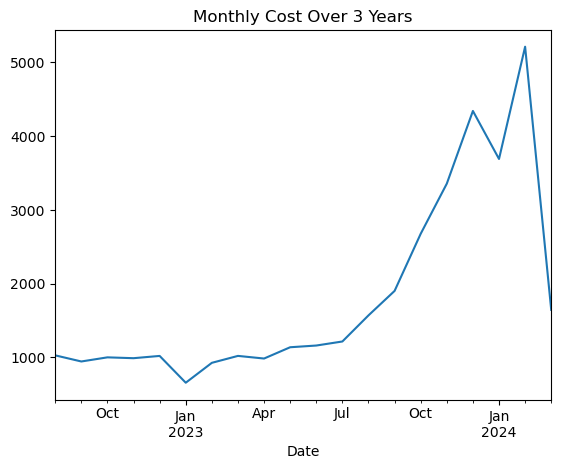

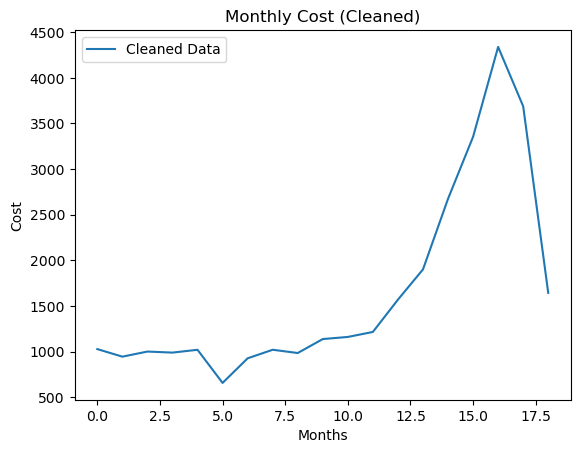

C:\Users\PoojaniRathnayakeBIS\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


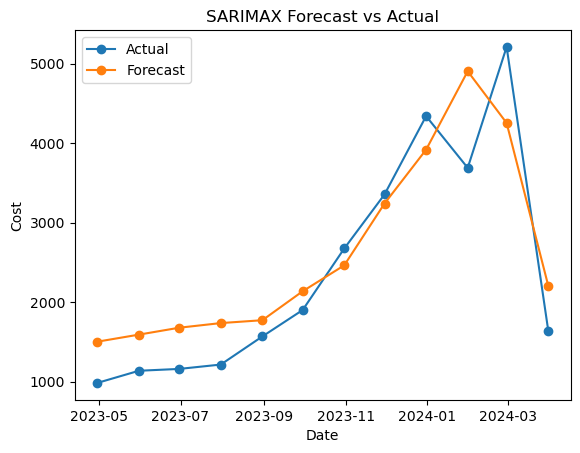

                 Actual     Forecast
Date                                
2023-04-30   983.521176  1502.150664
2023-05-31  1136.477308  1591.070469
2023-06-30  1159.672154  1677.869256
2023-07-31  1214.492964  1736.199814
2023-08-31  1568.471788  1772.360288
2023-09-30  1900.146118  2136.249488
2023-10-31  2674.407935  2462.660486
2023-11-30  3353.829158  3239.717623
2023-12-31  4339.273875  3917.654270
2024-01-31  3688.489051  4903.887435
2024-02-29  5209.832324  4252.683872
2024-03-31  1642.867141  2207.284351


In [21]:
# Plot monthly cost for 3 years
monthly_data = data.resample('M', on='Date').sum()
monthly_costs = monthly_data['Cost']
monthly_costs.plot(title='Monthly Cost Over 3 Years')
plt.show()

# Remove outliers using Isolation Forest
def remove_outliers(data):
    isolation_forest = IsolationForest(contamination=0.05)
    data = data.values.reshape(-1, 1)
    outliers = isolation_forest.fit_predict(data)
    return data[outliers == 1].flatten()

monthly_costs_cleaned = remove_outliers(monthly_costs)

# Plot cleaned monthly cost data
plt.plot(monthly_costs_cleaned, label='Cleaned Data')
plt.title('Monthly Cost (Cleaned)')
plt.xlabel('Months')
plt.ylabel('Cost')
plt.legend()
plt.show()

# SARIMAX Forecasting
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(monthly_costs_cleaned, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

# Forecast
forecast = result.forecast(steps=12)

# Plot forecast vs actuals
plt.plot(monthly_data.index[-12:], monthly_costs[-12:], label='Actual', marker='o')
plt.plot(monthly_data.index[-12:], forecast, label='Forecast', marker='o')
plt.title('SARIMAX Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Create DataFrame for Actual vs Forecast
forecast_df = pd.DataFrame({'Actual': monthly_costs[-12:], 'Forecast': forecast})
print(forecast_df)
